# 1. 정상 거래 그룹핑 확인

In [2]:
import os
import pandas as pd
import networkx as nx
from networkx.algorithms import community
from sklearn import preprocessing # 레이블 인코딩과 같은 전처리 작업을 수행


pd.set_option('display.max_columns', None)
path = '../../../../../archive/raw/HI-Small_Trans.csv'
org_df = pd.read_csv(path)
df = org_df

#### 0. 데이터 전처리
def preprocess( df):
    #df = df_label_encoder(df,['Payment Format', 'Payment Currency', 'Receiving Currency']) # 레이블 인코딩 : 해당 컬럼을 정수로 변환.
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Timestamp'] = df['Timestamp'].apply(lambda x: x.value)
    df['Timestamp'] = (df['Timestamp']-df['Timestamp'].min())/(df['Timestamp'].max()-df['Timestamp'].min()) # 1~0 사이 값으로 정규화

    df['Account'] = df['From Bank'].astype(str) + '_' + df['Account']
    df['Account.1'] = df['To Bank'].astype(str) + '_' + df['Account.1'] # 은행 정보와 결합하여 고유한 계정 식별자 생성
    df = df.sort_values(by=['Account'])
    receiving_df = df[['Account.1', 'Amount Received', 'Receiving Currency']] # 송금 및 수금 데이터를 분리.
    paying_df = df[['Account', 'Amount Paid', 'Payment Currency']]
    receiving_df = receiving_df.rename({'Account.1': 'Account'}, axis=1)
    currency_ls = sorted(df['Receiving Currency'].unique()) # 사용된 통화 종류 목록을 생성

    return df, receiving_df, paying_df, currency_ls





df, receiving_df, paying_df, currency_ls = preprocess(df)
df.rename({'Account': 'sender'}, axis=1 , inplace=True)
df.rename({'Account.1': 'receiver'}, axis=1, inplace=True)




#### 1. 정상거래 데이터만 필터링
normal_df = df[df['Is Laundering']==0]




# 가중치 없는 그래프 생성 
nx_graph = nx.from_pandas_edgelist(normal_df, 'sender', 'receiver', create_using=nx.Graph())
communities = community.greedy_modularity_communities(nx_graph)
print("가중치 없는 그래프 커뮤니티 탐지 완료")


print("\n--- 커뮤니티 탐지 결과 ---")
print("\n1. 가중치 없는 그래프 커뮤니티:")
print(communities)

KeyboardInterrupt: 

In [3]:
################### 샘플링 ###########################
import os
import pandas as pd
import networkx as nx
from networkx.algorithms import community

pd.set_option('display.max_columns', None)
path = '../../../../../archive/raw/HI-Small_Trans.csv'
org_df = pd.read_csv(path)
df = org_df

#### 0. 데이터 전처리
def preprocess(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Timestamp'] = df['Timestamp'].apply(lambda x: x.value)
    df['Timestamp'] = (df['Timestamp'] - df['Timestamp'].min()) / (df['Timestamp'].max() - df['Timestamp'].min())  # 0~1로 정규화

    df['Account'] = df['From Bank'].astype(str) + '_' + df['Account']
    df['Account.1'] = df['To Bank'].astype(str) + '_' + df['Account.1']
    df = df.sort_values(by=['Account'])
    
    receiving_df = df[['Account.1', 'Amount Received', 'Receiving Currency']]
    paying_df = df[['Account', 'Amount Paid', 'Payment Currency']]
    receiving_df = receiving_df.rename({'Account.1': 'Account'}, axis=1)
    currency_ls = sorted(df['Receiving Currency'].unique()) 

    return df, receiving_df, paying_df, currency_ls

df, receiving_df, paying_df, currency_ls = preprocess(df)
df.rename({'Account': 'sender'}, axis=1, inplace=True)
df.rename({'Account.1': 'receiver'}, axis=1, inplace=True)

#### 1. 정상거래 데이터만 필터링
normal_df = df[df['Is Laundering'] == 0]

#### 2. 데이터 샘플링
# 데이터의 10%를 랜덤 샘플링
sampled_df = normal_df.sample(frac=0.1, random_state=42)

# 가중치 없는 그래프 생성
nx_graph = nx.from_pandas_edgelist(sampled_df, 'sender', 'receiver', create_using=nx.Graph())
communities = community.greedy_modularity_communities(nx_graph)
print("가중치 없는 그래프 커뮤니티 탐지 완료")

print("\n--- 커뮤니티 탐지 결과 ---")
print("\n1. 가중치 없는 그래프 커뮤니티:")
print(communities)

가중치 없는 그래프 커뮤니티 탐지 완료

--- 커뮤니티 탐지 결과 ---

1. 가중치 없는 그래프 커뮤니티:
[frozenset({'35684_80D95B750', '130435_80D8C6F80', '10642_813315420', '228921_80FB87720', '12_800132990', '44207_8139FF750', '701_8004E9DE0', '1_80EDAC4D0', '15040_80755D1C0', '130169_813F309B0', '8771_80117DEA0', '1688_800CAD8B0', '11405_800831AA0', '11471_800B448E0', '28771_81332B240', '16606_807ADCF80', '1244_80E615770', '11405_800BFDF00', '31917_801386DA0', '13432_8072106B0', '44238_81131ECB0', '233168_811A31220', '10232_80515E010', '3420_8014F0310', '1853_800DB45D0', '33780_80E062BA0', '1362_800C7E850', '4726_80272B6F0', '6075_8066F9480', '18617_80C36F1B0', '29251_8073278B0', '22205_812C5D7C0', '3698_813E00A40', '1729_809B6B7C0', '23833_802EE1610', '10_80005D160', '224466_803785290', '18819_803CB0050', '1411_8033A9D50', '17907_80E14A960', '25075_80403BE20', '2439_805093DD0', '19729_804E57300', '4866_805A2ACF0', '23885_80510F1E0', '130449_811C69960', '6179_80A02B5A0', '137335_8129BEC40', '11471_801E08420', '23885_806C7C

In [ ]:
############## 노드 중심 샘플링 #################
import os
import pandas as pd
import networkx as nx
from networkx.algorithms import community

pd.set_option('display.max_columns', None)
path = '../../../../../archive/raw/HI-Small_Trans.csv'
org_df = pd.read_csv(path)
df = org_df

#### 0. 데이터 전처리
def preprocess(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Timestamp'] = df['Timestamp'].apply(lambda x: x.value)
    df['Timestamp'] = (df['Timestamp'] - df['Timestamp'].min()) / (df['Timestamp'].max() - df['Timestamp'].min())

    df['Account'] = df['From Bank'].astype(str) + '_' + df['Account']
    df['Account.1'] = df['To Bank'].astype(str) + '_' + df['Account.1']
    df = df.sort_values(by=['Account'])

    receiving_df = df[['Account.1', 'Amount Received', 'Receiving Currency']]
    paying_df = df[['Account', 'Amount Paid', 'Payment Currency']]
    receiving_df = receiving_df.rename({'Account.1': 'Account'}, axis=1)
    currency_ls = sorted(df['Receiving Currency'].unique())

    return df, receiving_df, paying_df, currency_ls

df, receiving_df, paying_df, currency_ls = preprocess(df)
df.rename({'Account': 'sender'}, axis=1, inplace=True)
df.rename({'Account.1': 'receiver'}, axis=1, inplace=True)

#### 1. 정상거래 데이터만 필터링
normal_df = df[df['Is Laundering'] == 0]

#### 2. 커뮤니티 구조 보존 샘플링 수행
# 가중치 없는 전체 그래프 생성
full_graph = nx.from_pandas_edgelist(normal_df, 'sender', 'receiver', create_using=nx.Graph())

# 노드를 기준으로 커뮤니티 구조를 최대한 보존하는 샘플링 수행
def sample_graph(graph, sample_size=100):
    from random import choice

    sampled_nodes = set()
    starting_node = choice(list(graph.nodes()))  # 시작 노드를 임의로 선택
    nodes_to_visit = {starting_node}

    while len(sampled_nodes) < sample_size and nodes_to_visit:
        node = nodes_to_visit.pop()
        sampled_nodes.add(node)
        neighbors = set(graph.neighbors(node)) - sampled_nodes
        nodes_to_visit.update(neighbors)

    return graph.subgraph(sampled_nodes)

# 샘플 크기 지정 (적절히 조정 가능)
sample_size = 200  # 노드의 수
sampled_graph = sample_graph(full_graph, sample_size=sample_size)

# 다시 샘플링된 그래프에서 커뮤니티 탐지
if len(sampled_graph.nodes) > 0:
    communities = community.greedy_modularity_communities(sampled_graph)
    print("커뮤니티 탐지 완료")
    print("\n--- 커뮤니티 탐지 결과 ---")
    print(communities)
else:
    print("샘플링된 그래프에 노드가 없습니다.")



커뮤니티 탐지 완료

--- 커뮤니티 탐지 결과 ---
[frozenset({'19818_80EF42C50', '14_814272760', '35594_803936B10', '120193_81372B740', '19818_80E806D60', '3_80CB04A10', '18097_8036AB9F0', '18200_803EBCEF0', '1267_803001630', '1267_802880270', '1267_803602280', '112078_80B1E39C0', '13067_8137CA270', '225622_80D6C3760', '9328_8047E4320', '131808_80D6BB540', '312238_806946610', '18196_803668DA0', '19477_8040AECB0', '1267_80F0EE420', '12278_811BB0F30', '339439_810733DF0', '312249_808DE9450', '18107_80B172360', '12278_80BC67AC0', '5627_8038E3F70', '20_8035D7010', '18097_80CC0E9E0', '1267_80302A0C0', '9587_809F544C0', '35323_802FD3B60', '3_804F3E100', '120193_80B76B4F0', '3_802F75BC0', '18200_80F43B410', '70_1004286F0', '120193_80F9F37A0', '120193_8114B7B80', '42465_810D5FEF0', '350590_812E23FC0', '20_8044DA010', '1267_8007C21A0'}), frozenset({'14_8007C2A40', '20_80079B440', '20_8007B65D0', '1267_8007C89A0'}), frozenset({'12278_80A207230', '3_803B7D360', '34828_80D581FD0'}), frozenset({'23146_8035CB7E0', '231

In [7]:
for i, community_set in enumerate(communities):
    print(f"\n------------ 커뮤니티 {i+1} 분석 ------------")
    community_df = normal_df[normal_df['sender'].isin(community_set) | normal_df['receiver'].isin(community_set)] # sender 또는 receiver 중 하나라도 커뮤니티에 속하면 해당 거래 포함
    
    print(f"커뮤니티 크기: {len(community_set)}, 거래 건수: {len(community_df)}")

    #  Payment Format 분포 확인
    payment_format_counts = community_df['Payment Format'].value_counts()
    print("\nPayment Format 분포:")
    print(payment_format_counts)

    # Receiving Currency 분포 확인
    receiving_currency_counts = community_df['Payment Currency'].value_counts()
    print("\nPayment Currency 분포:")
    print(receiving_currency_counts)


    # Receiving Currency 분포 확인
    receiving_currency_counts = community_df['Receiving Currency'].value_counts()
    print("\nReceiving Currency 분포:")
    print(receiving_currency_counts)


------------ 커뮤니티 1 분석 ------------
커뮤니티 크기: 42, 거래 건수: 19584

Payment Format 분포:
Cheque          9586
Credit Card     5771
Cash            4093
ACH              104
Reinvestment      16
Wire              14
Name: Payment Format, dtype: int64

Payment Currency 분포:
Yuan           19562
US Dollar         20
Swiss Franc        2
Name: Payment Currency, dtype: int64

Receiving Currency 분포:
Yuan           19540
US Dollar         40
Swiss Franc        4
Name: Receiving Currency, dtype: int64

------------ 커뮤니티 2 분석 ------------
커뮤니티 크기: 4, 거래 건수: 120

Payment Format 분포:
ACH             83
Cheque          17
Cash             7
Credit Card      7
Reinvestment     6
Name: Payment Format, dtype: int64

Payment Currency 분포:
Yuan    120
Name: Payment Currency, dtype: int64

Receiving Currency 분포:
Yuan    120
Name: Receiving Currency, dtype: int64

------------ 커뮤니티 3 분석 ------------
커뮤니티 크기: 3, 거래 건수: 89

Payment Format 분포:
Cheque          35
Credit Card     28
ACH             19
Cash            

In [8]:
#### 2. 커뮤니티 크기 분포 확인
###### 2.1 가중치 없는 그래프 커뮤니티
community_sizes = [len(c) for c in communities]
print(f"가중치 없는 그래프 커뮤니티 통계:")
print(pd.Series(community_sizes).describe())

가중치 없는 그래프 커뮤니티 통계:
count    134.000000
mean       1.492537
std        3.564120
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       42.000000
dtype: float64



------------ Community 1 Analysis ------------
커뮤니티 크기 : 42, 거래 건수 : 19584


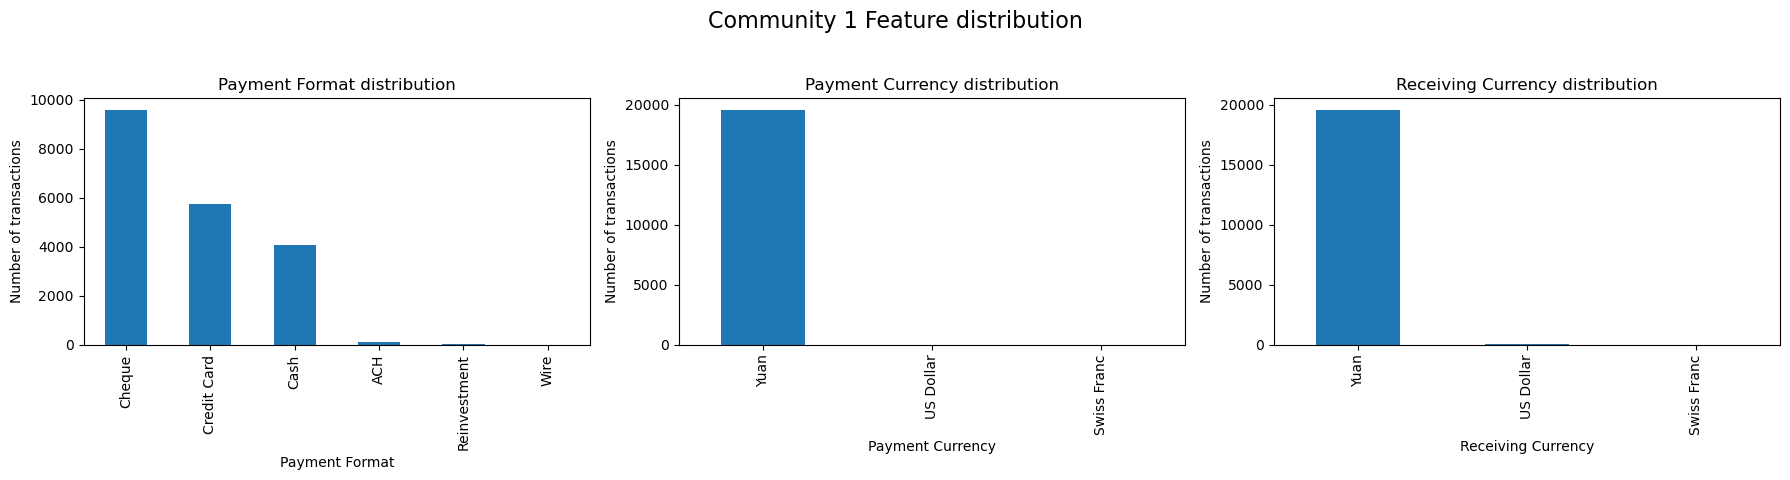


------------ Community 2 Analysis ------------
커뮤니티 크기 : 4, 거래 건수 : 120


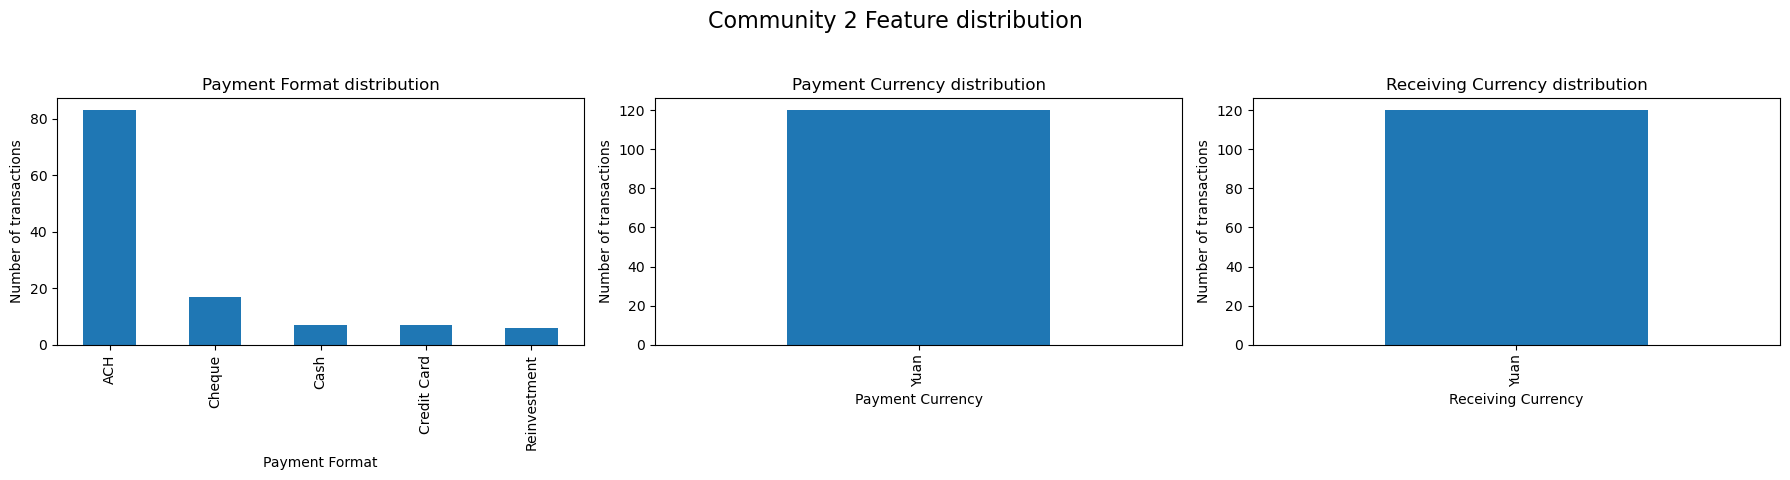


------------ Community 3 Analysis ------------
커뮤니티 크기 : 3, 거래 건수 : 89


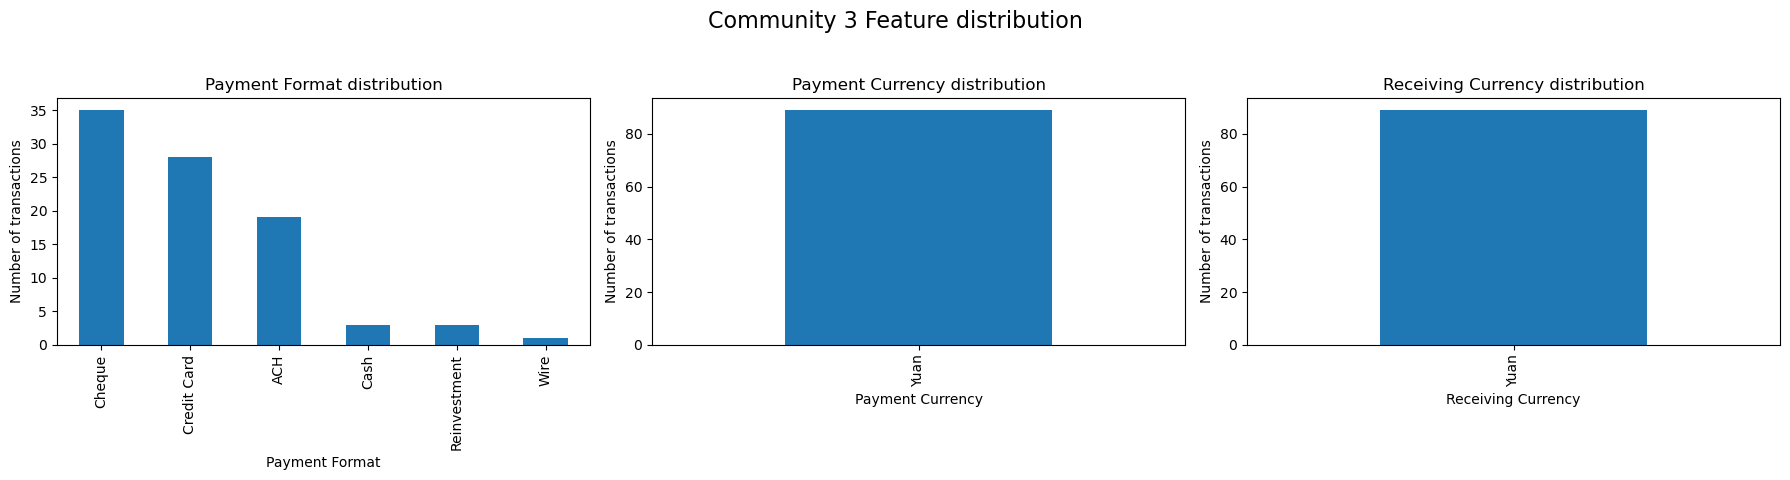


------------ Community 4 Analysis ------------
커뮤니티 크기 : 3, 거래 건수 : 153


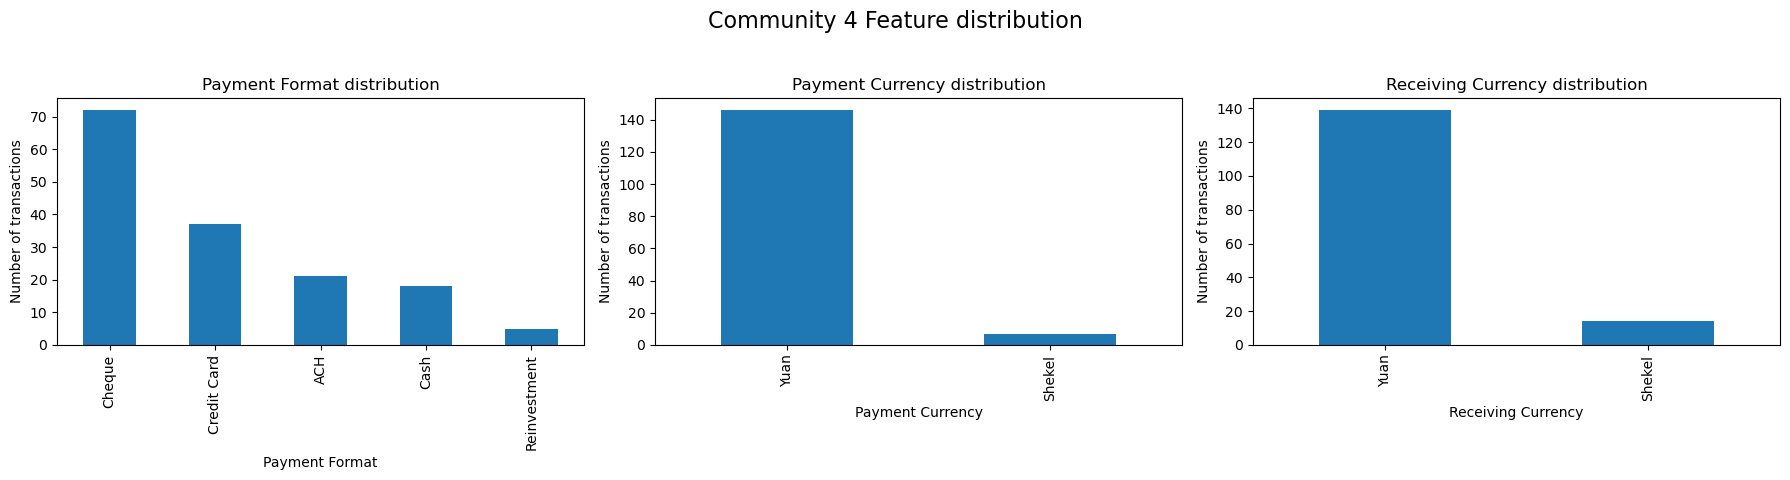


------------ Community 5 Analysis ------------
커뮤니티 크기 : 3, 거래 건수 : 92


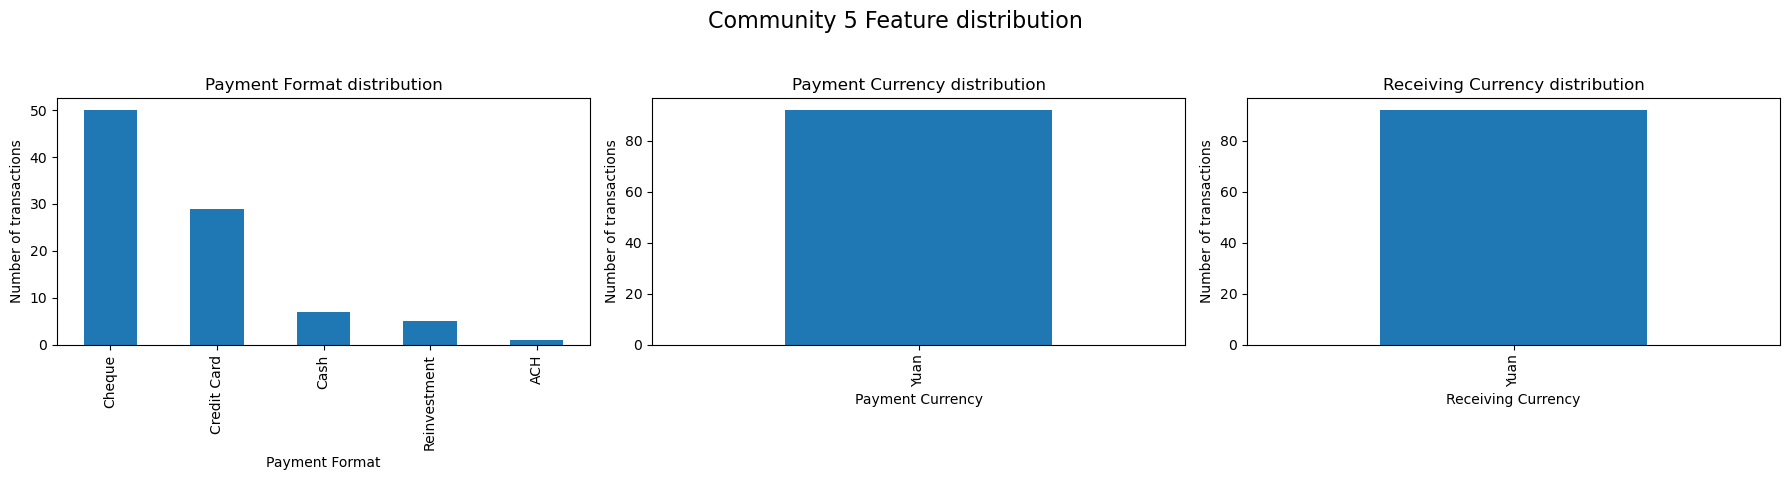


------------ Community 6 Analysis ------------
커뮤니티 크기 : 3, 거래 건수 : 154


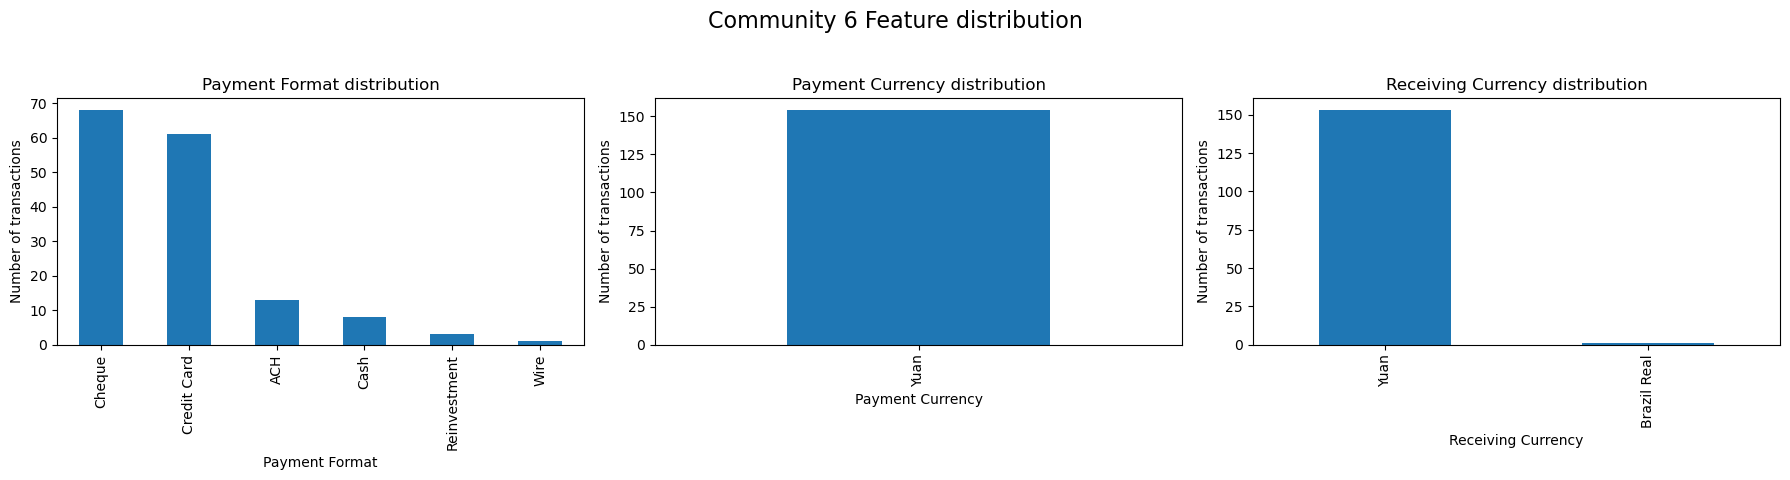


------------ Community 7 Analysis ------------
커뮤니티 크기 : 3, 거래 건수 : 236


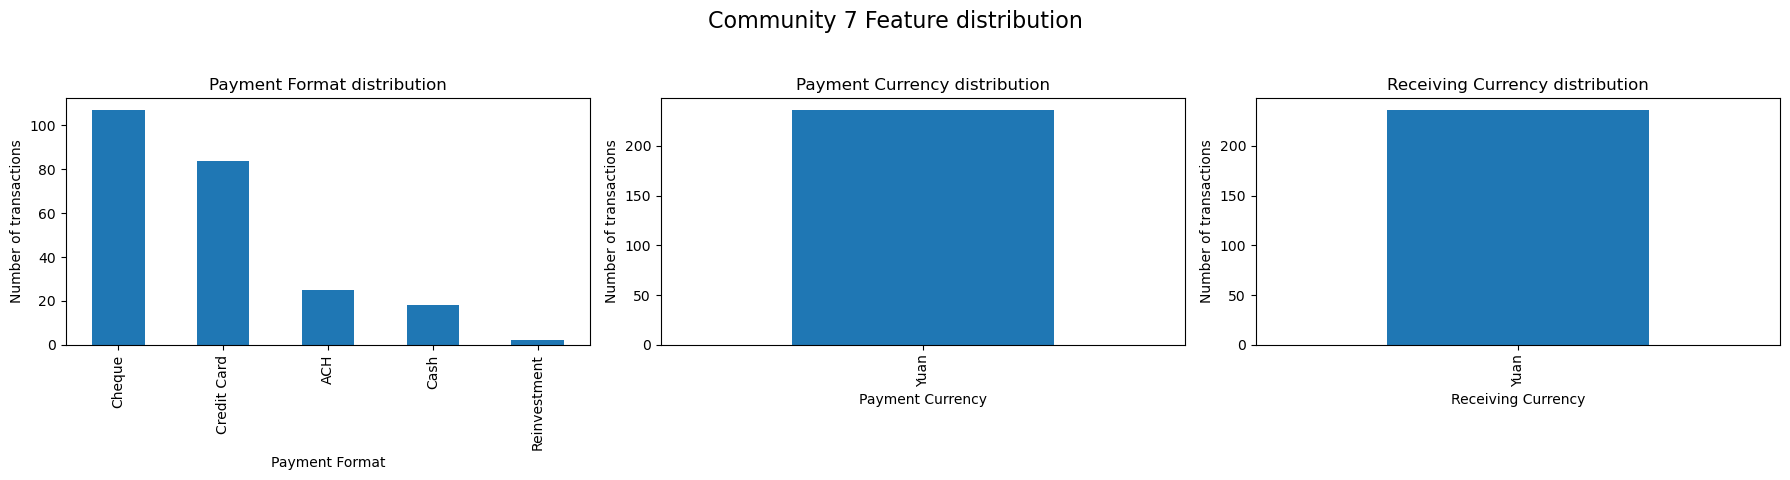


------------ Community 8 Analysis ------------
커뮤니티 크기 : 2, 거래 건수 : 39


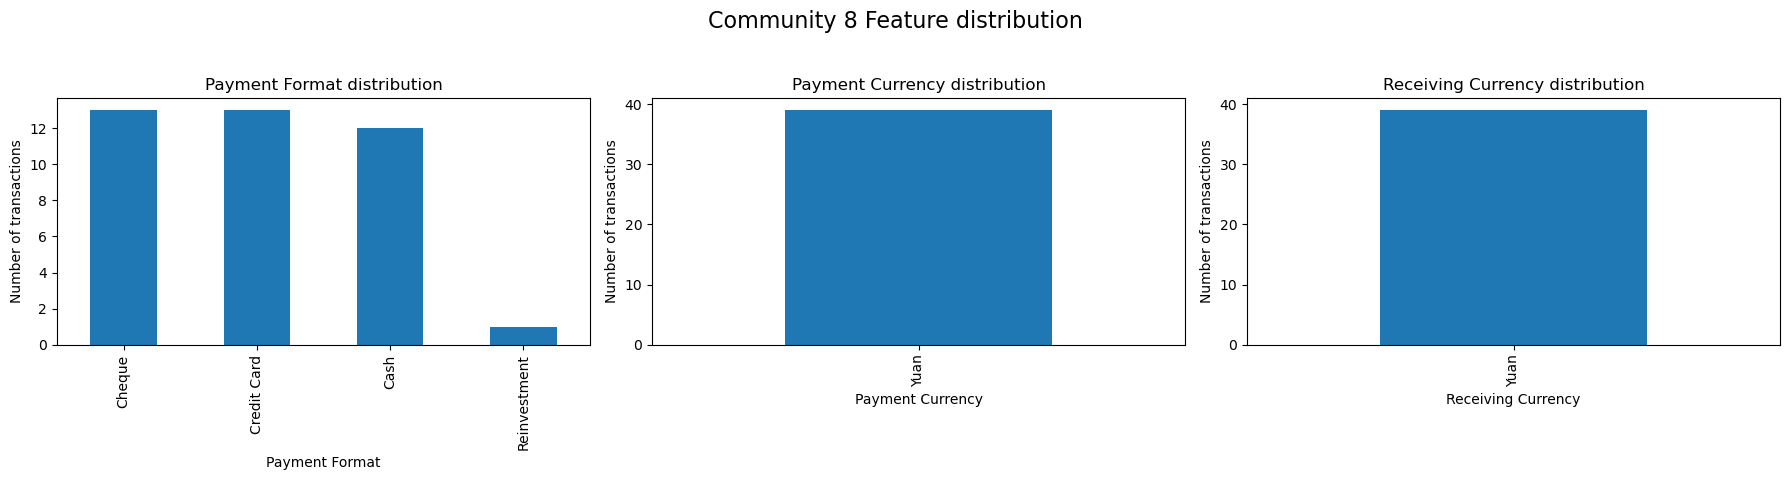


------------ Community 9 Analysis ------------
커뮤니티 크기 : 2, 거래 건수 : 59


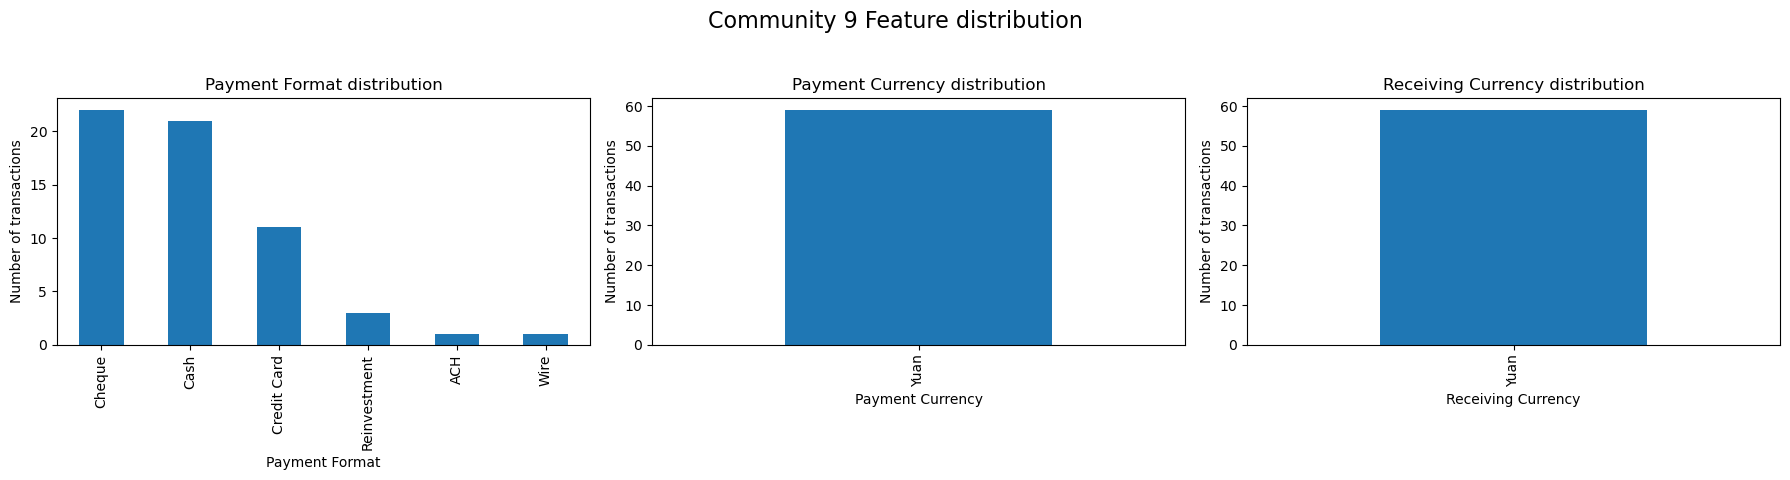


------------ Community 10 Analysis ------------
커뮤니티 크기 : 2, 거래 건수 : 28


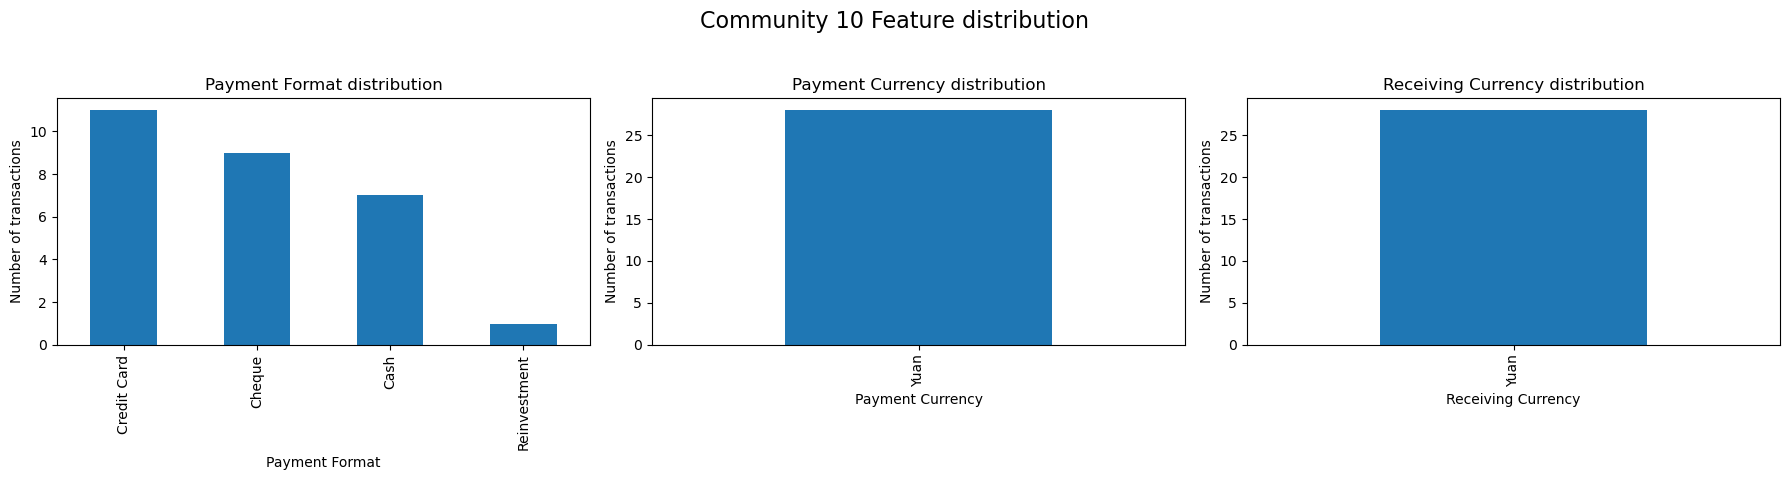


------------ Community 11 Analysis ------------
커뮤니티 크기 : 2, 거래 건수 : 44


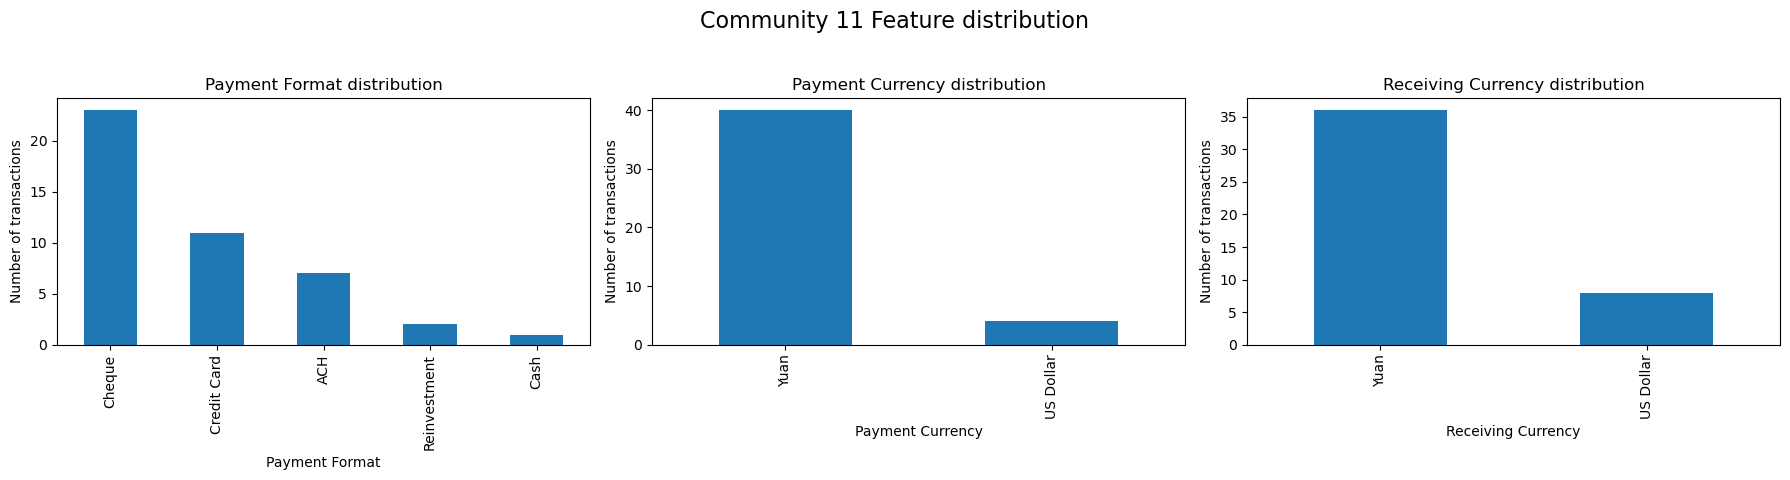


------------ Community 12 Analysis ------------
커뮤니티 크기 : 2, 거래 건수 : 13


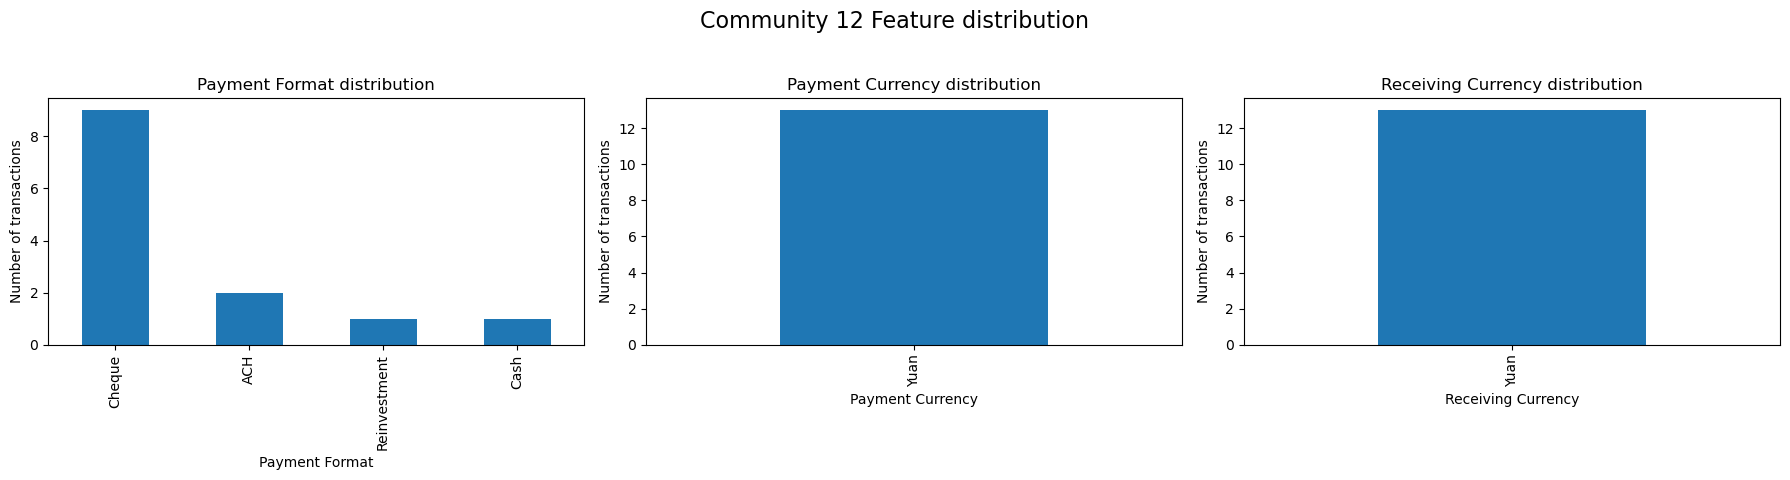


------------ Community 13 Analysis ------------
커뮤니티 크기 : 2, 거래 건수 : 35


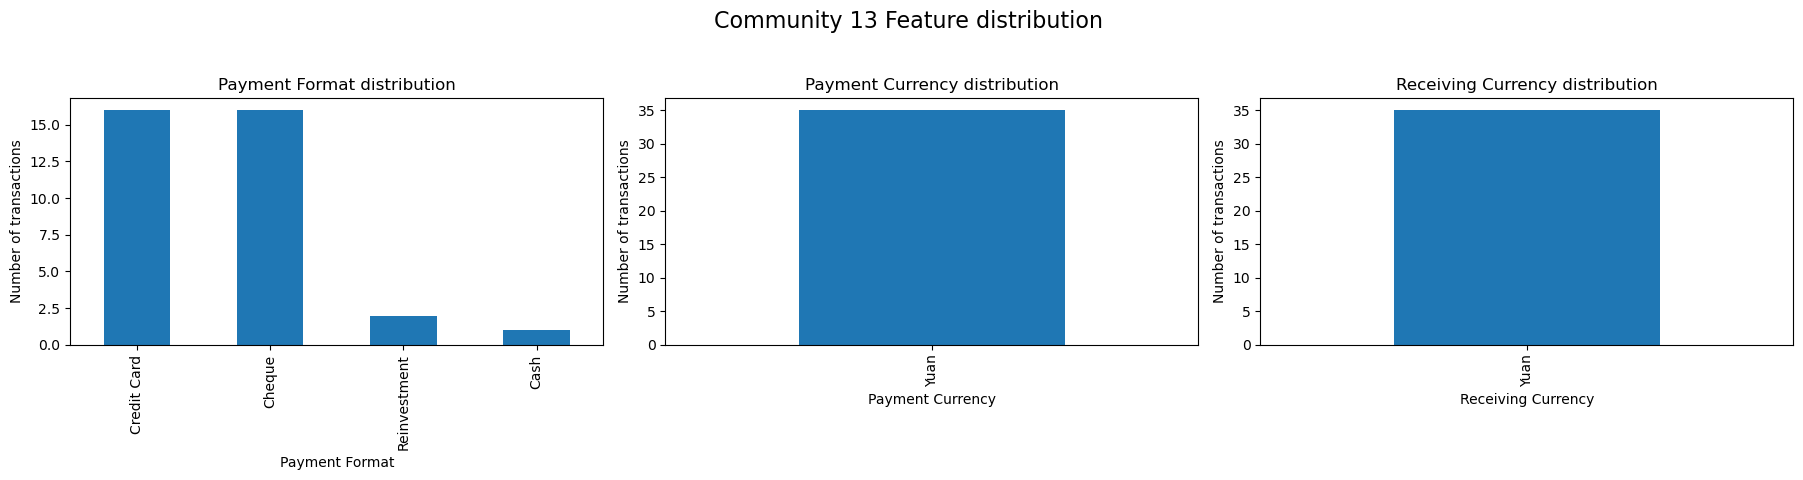


------------ Community 14 Analysis ------------
커뮤니티 크기 : 2, 거래 건수 : 81


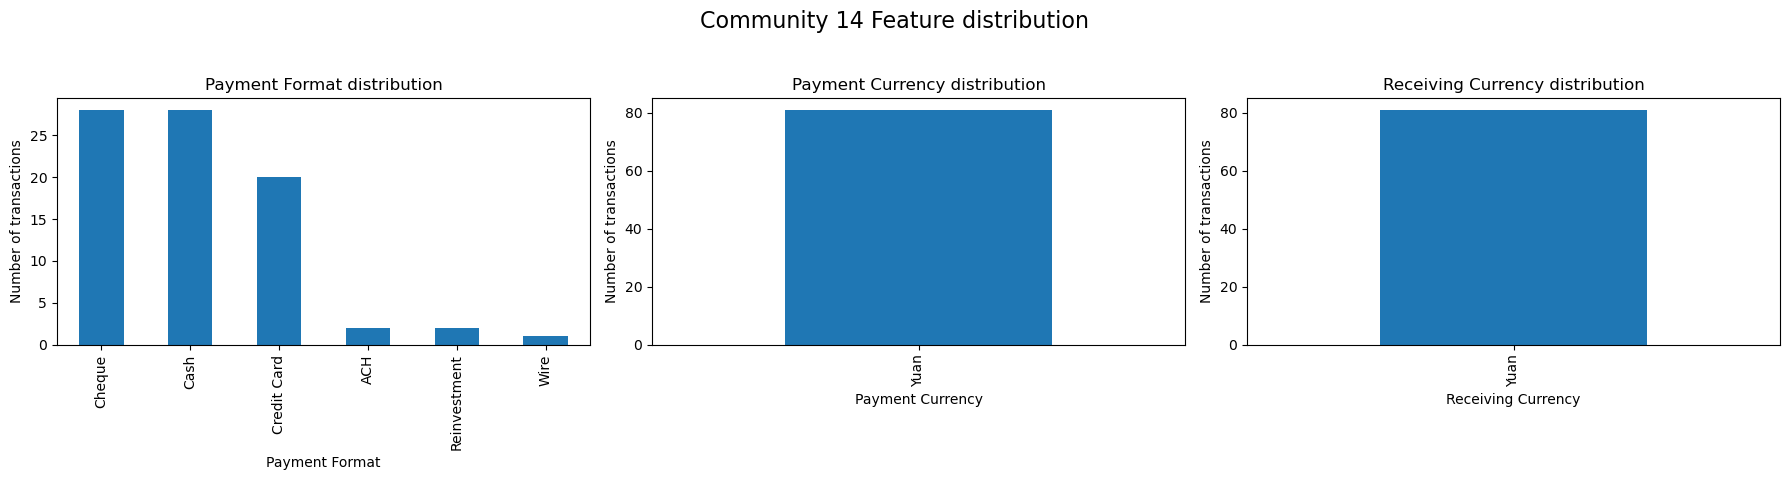


------------ Community 15 Analysis ------------
커뮤니티 크기 : 2, 거래 건수 : 41


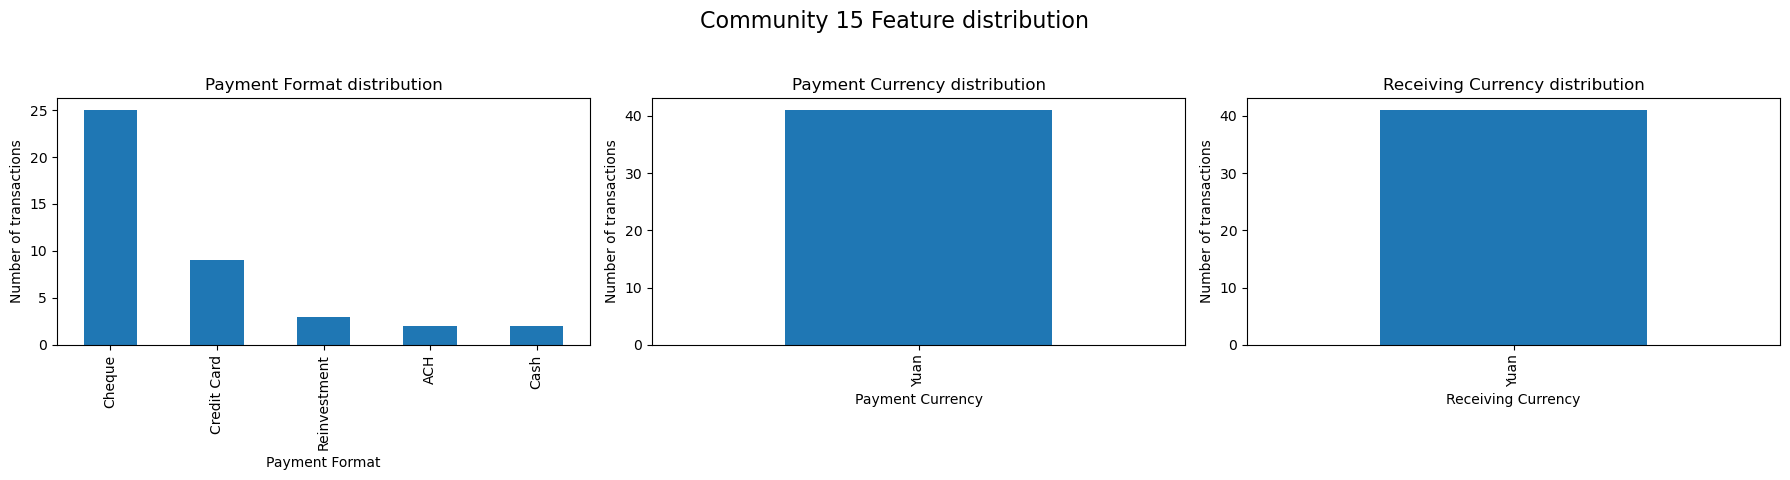


------------ Community 16 Analysis ------------
커뮤니티 크기 : 2, 거래 건수 : 253


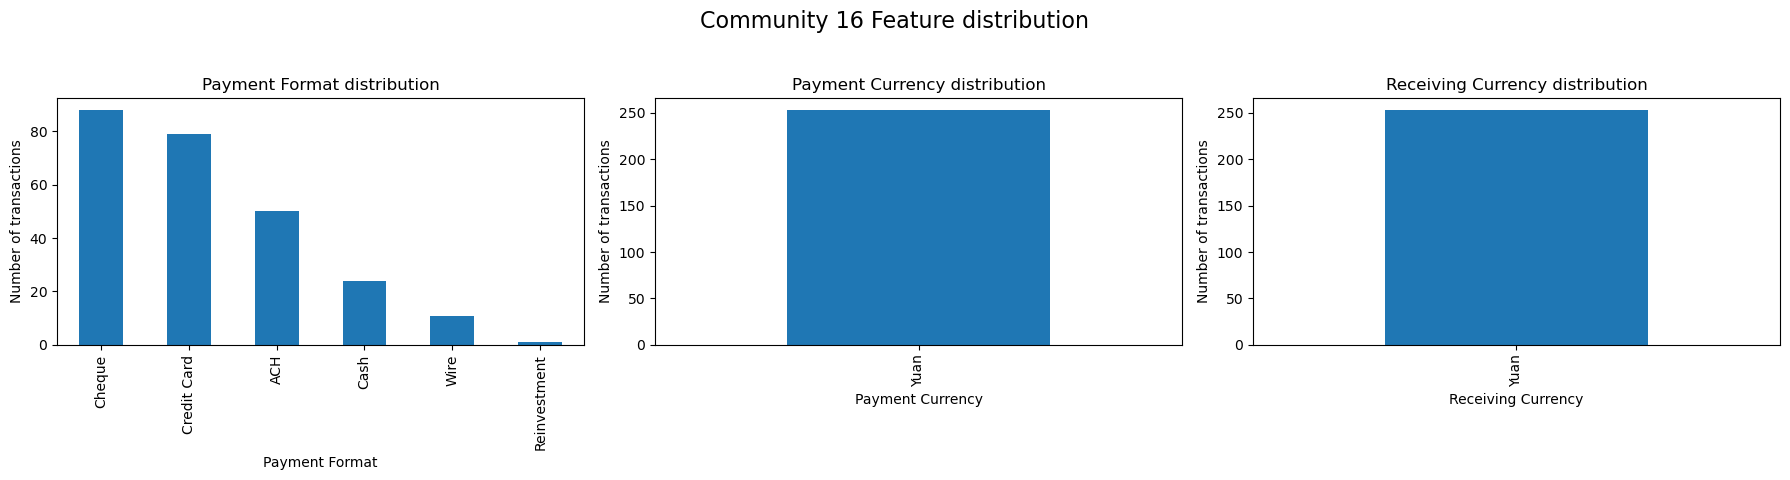


------------ Community 17 Analysis ------------
커뮤니티 크기 : 2, 거래 건수 : 125


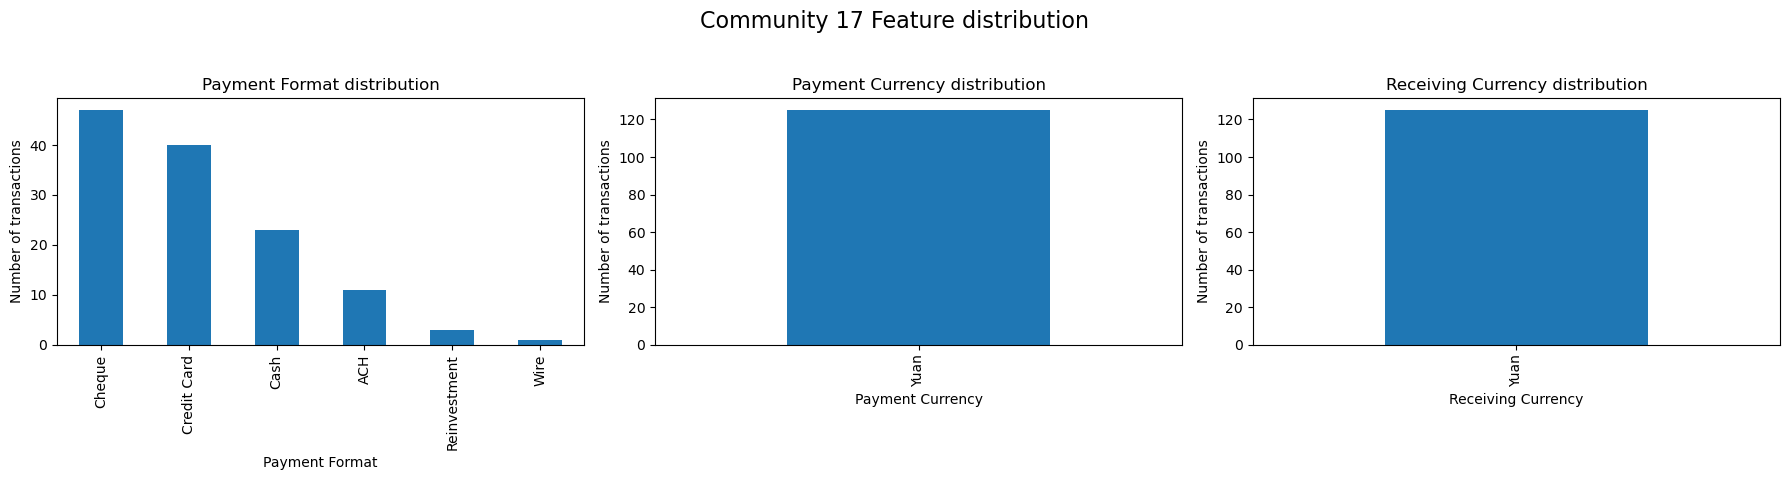


------------ Community 18 Analysis ------------
커뮤니티 크기 : 2, 거래 건수 : 56


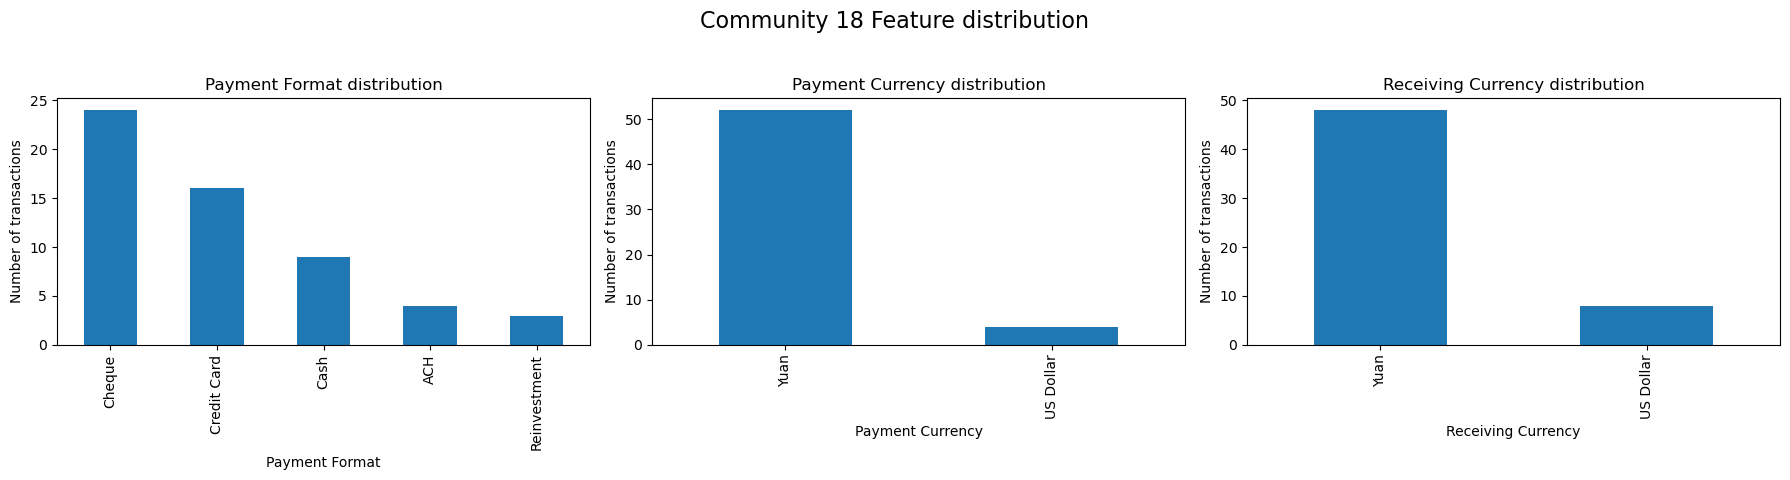


------------ Community 19 Analysis ------------
커뮤니티 크기 : 2, 거래 건수 : 20


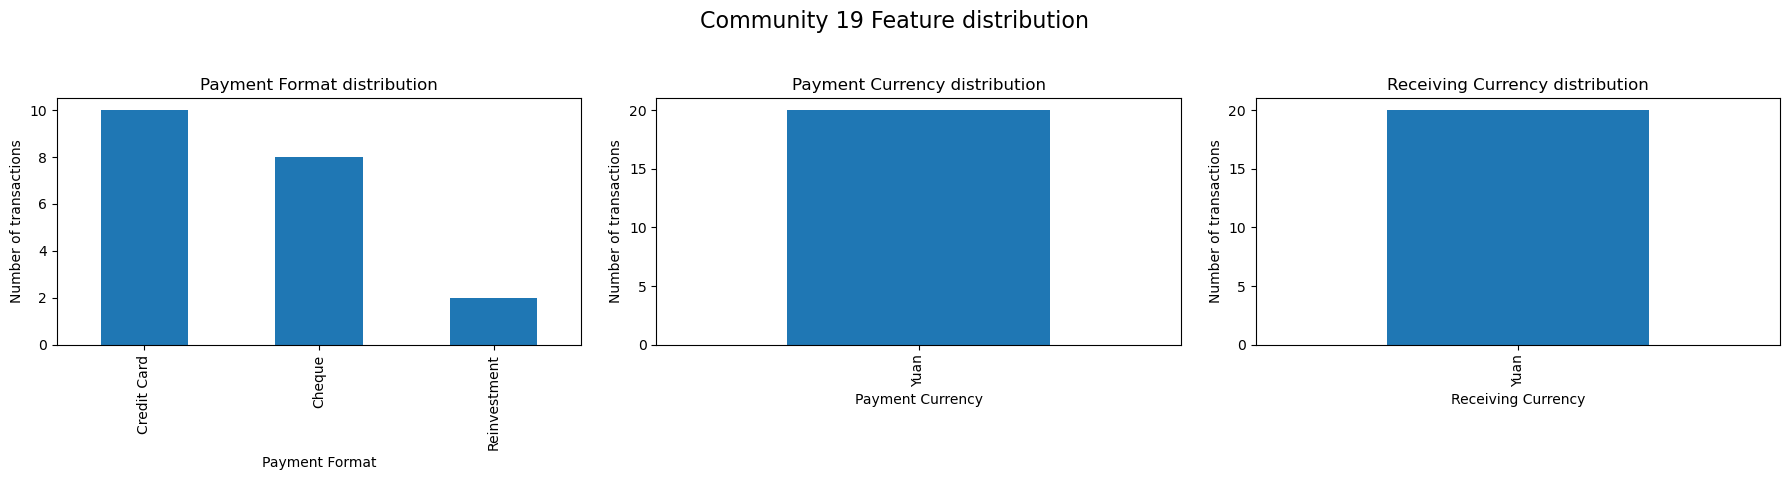


------------ Community 20 Analysis ------------
커뮤니티 크기 : 1, 거래 건수 : 32


KeyboardInterrupt: 

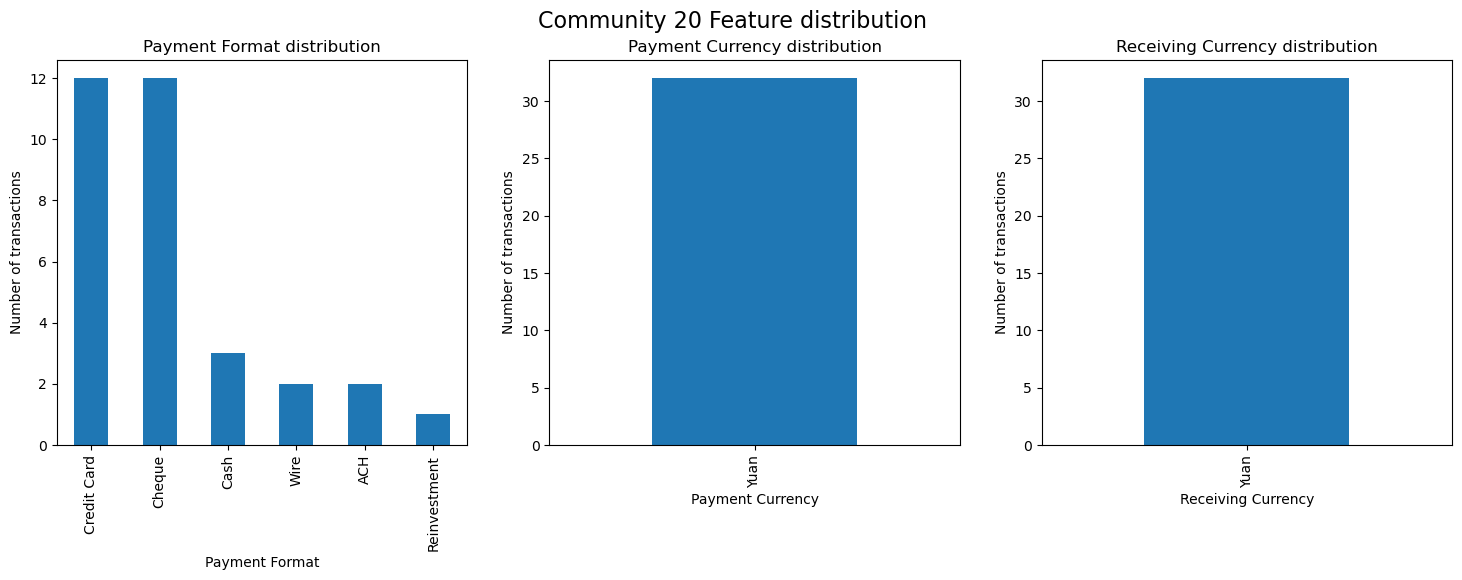

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

for i, community_set in enumerate(communities):
    print(f"\n------------ Community {i+1} Analysis ------------")
    community_df = normal_df[normal_df['sender'].isin(community_set) | normal_df['receiver'].isin(community_set)]
    print(f"커뮤니티 크기 : {len(community_set)}, 거래 건수 : {len(community_df)}")

    # 시각화 준비
    fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1행 3열 그래프 생성
    fig.suptitle(f'Community {i+1} Feature distribution', fontsize=16)

    # 1. Payment Format 분포 막대 그래프
    payment_format_counts = community_df['Payment Format'].value_counts()
    payment_format_counts.plot(kind='bar', ax=axes[0])
    axes[0].set_title('Payment Format distribution')
    axes[0].set_xlabel('Payment Format')
    axes[0].set_ylabel('Number of transactions')

    # 2. Payment Currency 분포 막대 그래프
    payment_currency_counts = community_df['Payment Currency'].value_counts()
    payment_currency_counts.plot(kind='bar', ax=axes[1])
    axes[1].set_title('Payment Currency distribution')
    axes[1].set_xlabel('Payment Currency')
    axes[1].set_ylabel('Number of transactions')

    # 3. Receiving Currency 분포 막대 그래프
    receiving_currency_counts = community_df['Receiving Currency'].value_counts()
    receiving_currency_counts.plot(kind='bar', ax=axes[2])
    axes[2].set_title('Receiving Currency distribution')
    axes[2].set_xlabel('Receiving Currency')
    axes[2].set_ylabel('Number of transactions')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 제목 때문에 레이아웃 조정
    plt.show()